Jacob Valdenegro Monzón A01640992

# Ejercicio 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer,r2_score
from sklearn.model_selection import LeavePOut
from sklearn.preprocessing import StandardScaler

# Cargar el archivo CSV
file_path = 'life_expectancy_data.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas para inspeccionar las columnas
data.head(), data.columns


(       Country  Year      Status  Life expectancy   Adult Mortality  \
 0  Afghanistan  2015  Developing              65.0            263.0   
 1  Afghanistan  2014  Developing              59.9            271.0   
 2  Afghanistan  2013  Developing              59.9            268.0   
 3  Afghanistan  2012  Developing              59.5            272.0   
 4  Afghanistan  2011  Developing              59.2            275.0   
 
    infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
 0             62     0.01               71.279624         65.0      1154  ...   
 1             64     0.01               73.523582         62.0       492  ...   
 2             66     0.01               73.219243         64.0       430  ...   
 3             69     0.01               78.184215         67.0      2787  ...   
 4             71     0.01                7.097109         68.0      3013  ...   
 
    Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Popula

In [2]:
# Limpiar los nombres de las columnas eliminando espacios innecesarios
data.columns = data.columns.str.strip()

# Seleccionar las variables de interés
variables_seleccionadas = [
    'Adult Mortality', 'infant deaths', 'Alcohol',
    'percentage expenditure', 'Measles', 'BMI',
    'under-five deaths', 'Total expenditure',
    'Diphtheria', 'HIV/AIDS', 'Population',
    'thinness  1-19 years', 'thinness 5-9 years',
    'Schooling'
]


# Filtrar los datos con las variables seleccionadas
data_filtered = data[variables_seleccionadas]

# Mostrar las primeras filas del conjunto de datos filtrado
data_filtered.head()


,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,thinness 5-9 years,Schooling
0,263.0,62,0.01,71.279624,1154,19.1,83,8.16,65.0,0.1,33736494.0,17.2,17.3,10.1
1,271.0,64,0.01,73.523582,492,18.6,86,8.18,62.0,0.1,327582.0,17.5,17.5,10.0
2,268.0,66,0.01,73.219243,430,18.1,89,8.13,64.0,0.1,31731688.0,17.7,17.7,9.9
3,272.0,69,0.01,78.184215,2787,17.6,93,8.52,67.0,0.1,3696958.0,17.9,18.0,9.8
4,275.0,71,0.01,7.097109,3013,17.2,97,7.87,68.0,0.1,2978599.0,18.2,18.2,9.5


Grafica cada variable predictora vs la variable de respuesta asignadas a tu número de matrícula.


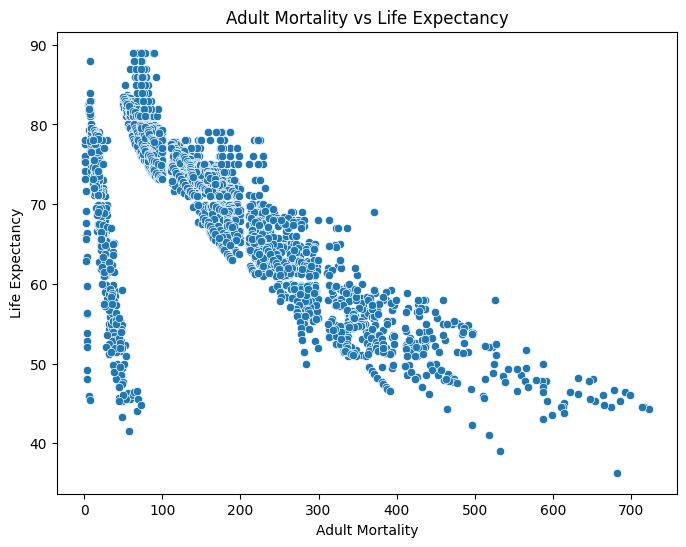

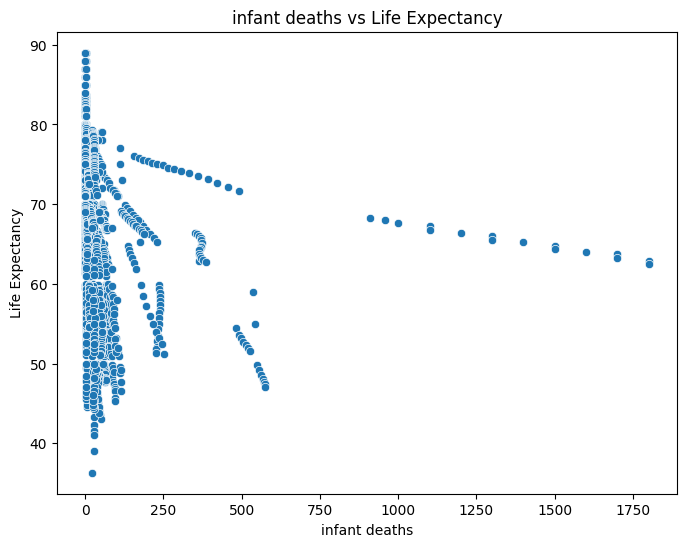

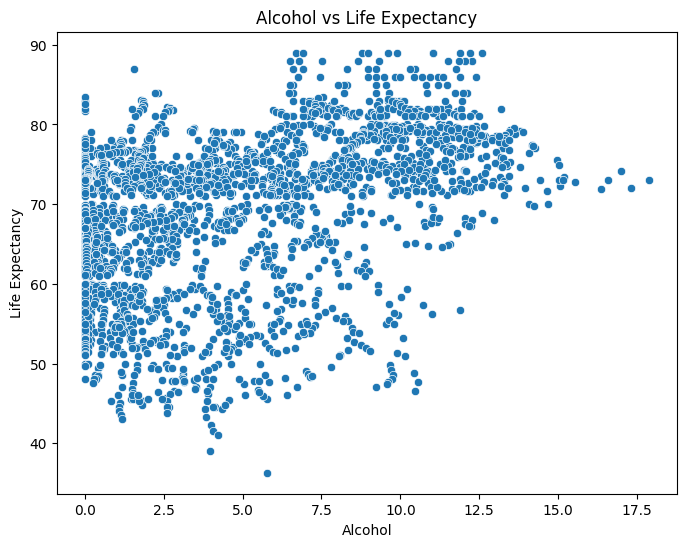

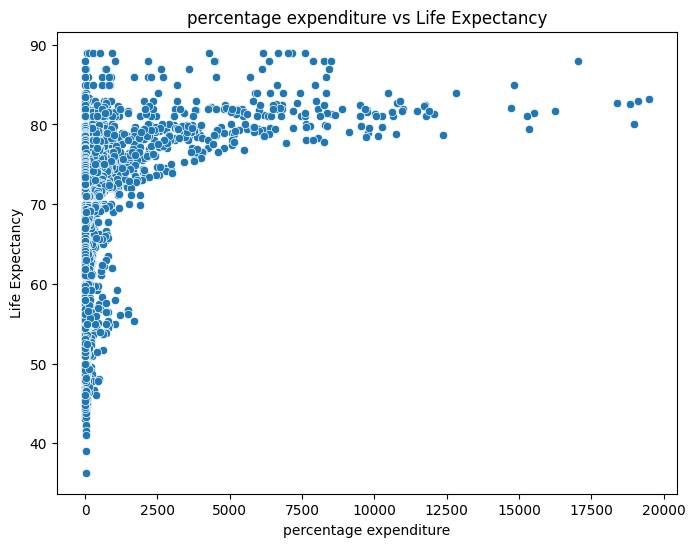

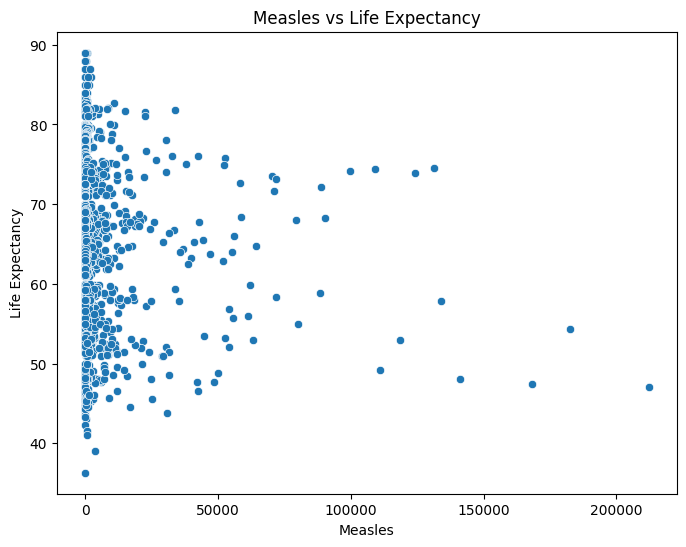

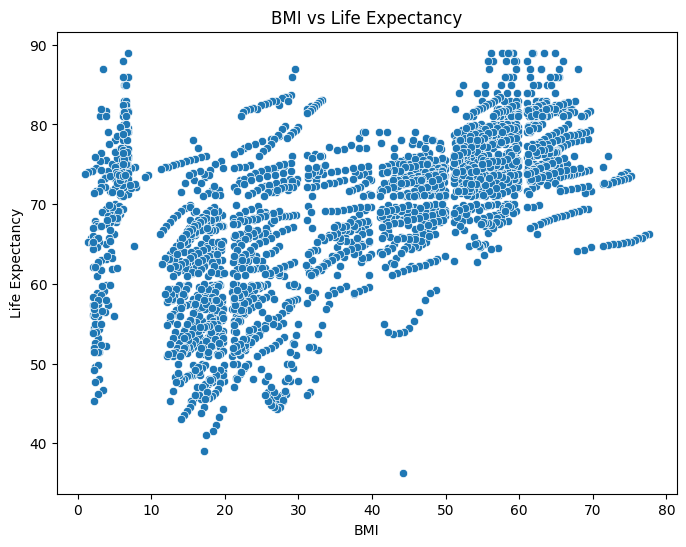

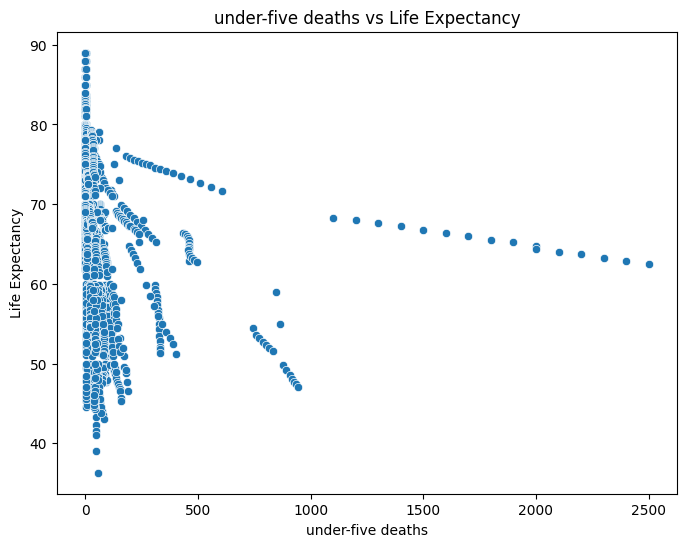

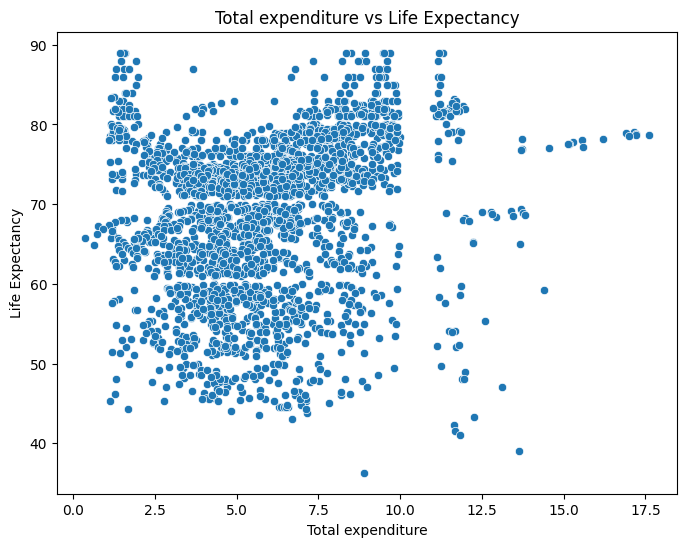

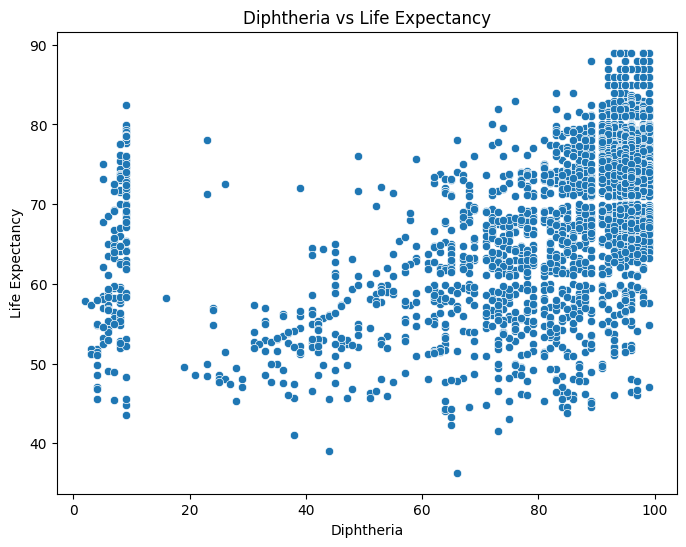

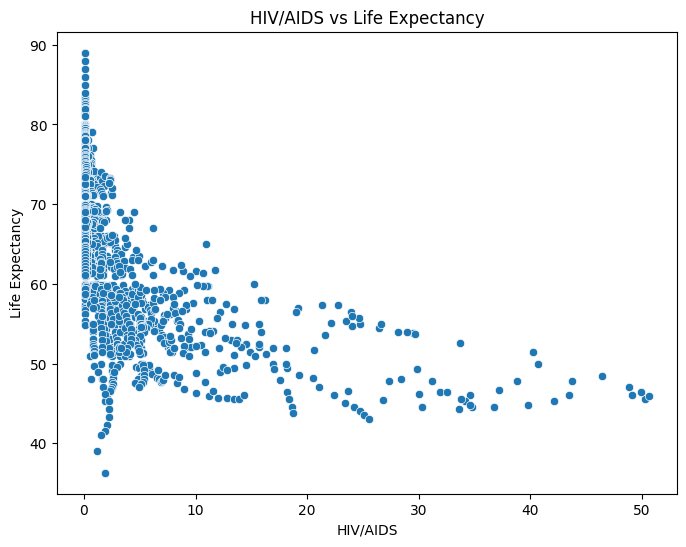

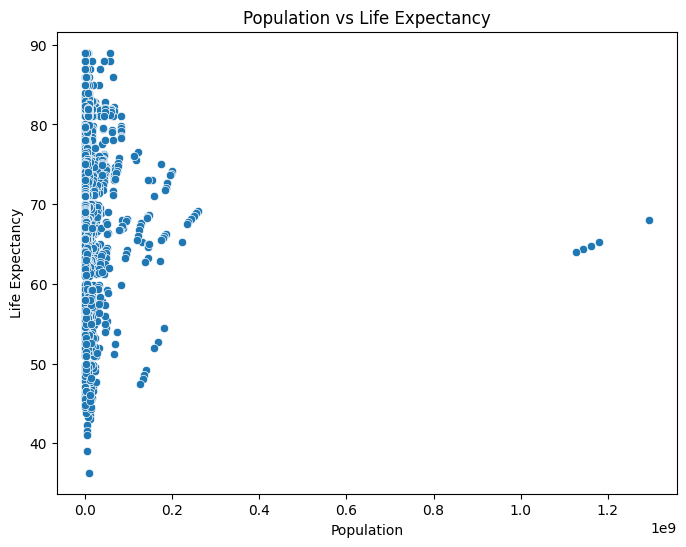

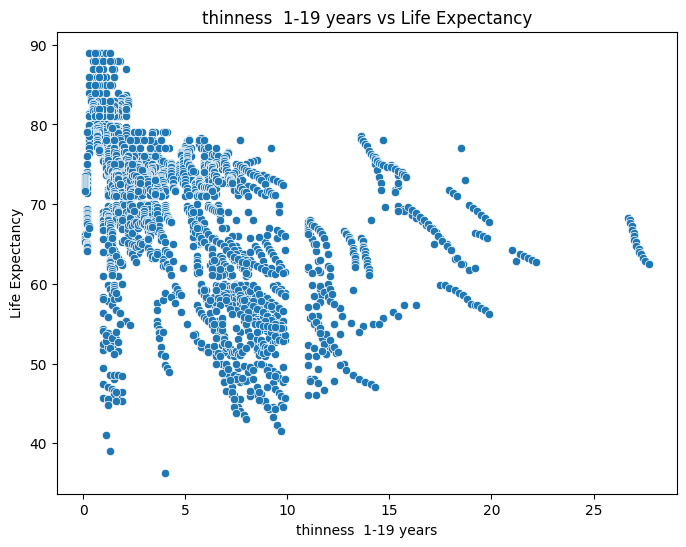

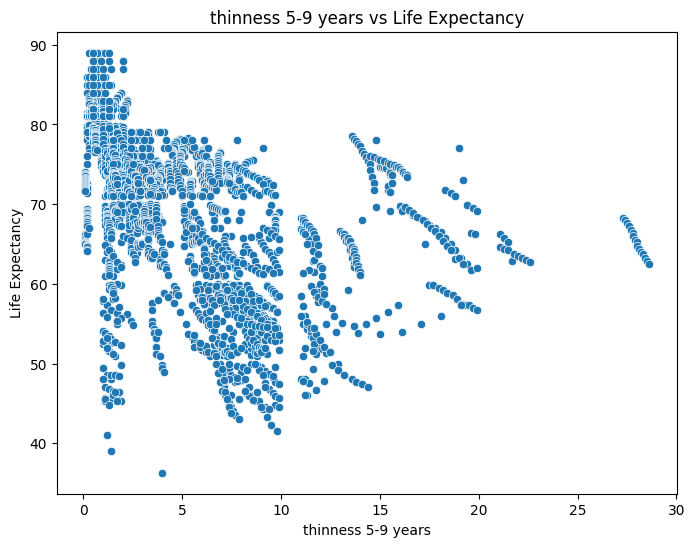

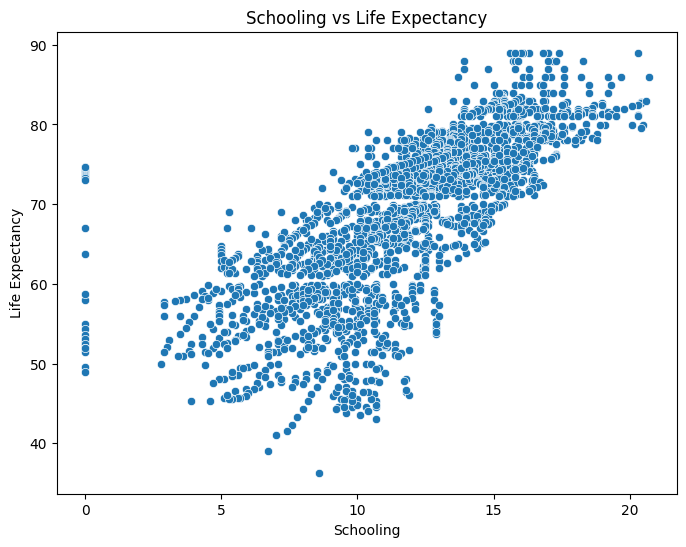

In [ ]:
# Crear gráficos de dispersión para cada variable predictora vs Life expectancy
for variable in variables_seleccionadas:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[variable], y=data['Life expectancy'])
    plt.title(f'{variable} vs Life Expectancy')
    plt.xlabel(variable)
    plt.ylabel('Life Expectancy')
    plt.show()

Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal, y obtenga con ella el modelo que corresponde a la variable de respuesta y las variables predictoras asignadas a tu número de matrícula.


In [ ]:
# Eliminar filas con valores faltantes en las variables seleccionadas o en la variable de respuesta
data_cleaned = data[['Life expectancy'] + variables_seleccionadas].dropna()

# Crear la matriz X (añadiendo una columna de unos para el término independiente)
X = data_cleaned[variables_seleccionadas]
X = np.c_[np.ones(X.shape[0]), X]  # Añadir columna de unos

# Crear el vector y
y = data_cleaned['Life expectancy']

# Calcular los coeficientes usando la fórmula directa
beta = np.linalg.inv(X.T @ X) @ (X.T @ y)

# Mostrar los coeficientes
coeficientes = pd.Series(beta, index=['Intercept'] + variables_seleccionadas)
print(coeficientes)

Intercept                 5.170615e+01
Adult Mortality          -1.611293e-02
infant deaths             9.700409e-02
Alcohol                  -4.301167e-02
percentage expenditure    4.019582e-04
Measles                  -7.895801e-06
BMI                       4.799413e-02
under-five deaths        -7.106888e-02
Total expenditure         4.529767e-03
Diphtheria                3.606948e-02
HIV/AIDS                 -4.790905e-01
Population               -2.026961e-09
thinness  1-19 years     -5.991909e-02
thinness 5-9 years       -1.085433e-02
Schooling                 1.362482e+00
dtype: float64


**Mi modelo**

In [3]:
class MiRegresionLineal:
    def fit(self, X, y):
        # Convertir X a un array de NumPy si es un DataFrame de pandas
        if isinstance(X, pd.DataFrame):
            X = X.values

        # Agregar una columna de unos para el término independiente (intercepto) si no está presente
        if not np.all((X[:, 0] == 1)):
            X = np.c_[np.ones(X.shape[0]), X]

        # Calcular los coeficientes usando la solución normal
        self.beta = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        # Convertir X a un array de NumPy si es un DataFrame de pandas
        if isinstance(X, pd.DataFrame):
            X = X.values

        # Agregar una columna de unos para el término independiente (intercepto) si no está presente
        if not np.all((X[:, 0] == 1)):
            X = np.c_[np.ones(X.shape[0]), X]

        # Realizar la predicción multiplicando X por los coeficientes beta
        return X @ self.beta

    # Agregar el método get_params
    def get_params(self, deep=True):
        # Retornar un diccionario vacío ya que no hay parámetros que obtener
        return {}


Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R2, MSE y MAE.


In [ ]:
# Eliminar filas con valores faltantes en las variables seleccionadas o en la variable de respuesta
data_cleaned = data[['Life expectancy'] + variables_seleccionadas].dropna()

# Crear la matriz X y el vector y
X = data_cleaned[variables_seleccionadas]
y = data_cleaned['Life expectancy']

# Definir el modelo de regresión lineal
model = MiRegresionLineal()

# Definir la validación cruzada de k-pliegues (k=5)
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=1)

# Listas para almacenar los resultados de cada pliegue
mse_cv = []
mae_cv = []
r2_cv = []

# Bucle de validación cruzada
for train_index, test_index in kf.split(X):

    # Separar los datos de entrenamiento y prueba
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Ajustar el modelo con los datos de entrenamiento
    model.fit(X_train, y_train)

    # Predecir con los datos de prueba
    y_pred = model.predict(X_test)

    # Calcular MSE, MAE y R²
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)

    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)

    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)

# Mostrar los resultados promedios
print(f"R² promedio: {np.mean(r2_cv):.4f}")
print(f"MSE promedio: {np.mean(mse_cv):.4f}")
print(f"MAE promedio: {np.mean(mae_cv):.4f}")

R² promedio: 0.8346
MSE promedio: 16.1002
MAE promedio: 3.0567


Utiliza validación cruzada de Monte Carlo con 1000 iteraciones para encontrar histogramas de R2, MSE y MAE.


R²: Mean=0.8336, Std=0.0100, Min=0.7982, Max=0.8679
MSE: Mean=16.2036, Std=1.0407, Min=12.7494, Max=19.9181
MAE: Mean=3.0661, Std=0.0904, Min=2.7276, Max=3.3808


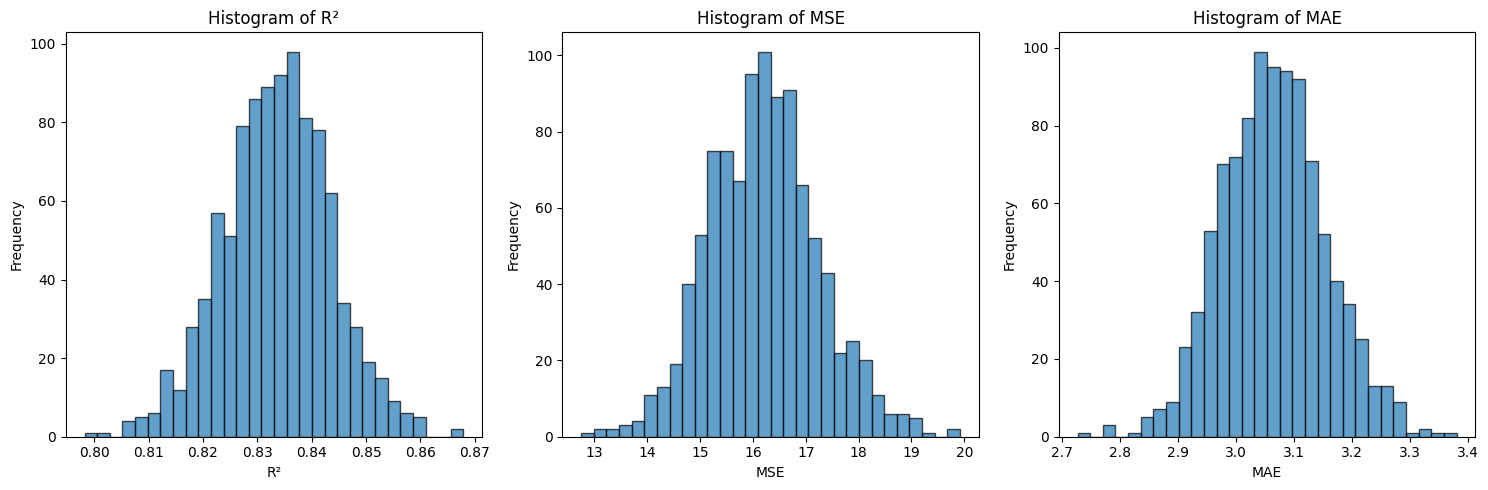

In [ ]:

# Eliminar filas con valores faltantes en las variables seleccionadas o en la variable de respuesta
data_cleaned = data[['Life expectancy'] + variables_seleccionadas].dropna()

# Crear la matriz X y el vector y
X = data_cleaned[variables_seleccionadas]
y = data_cleaned['Life expectancy']

# Configurar el modelo de regresión lineal
model = MiRegresionLineal()

# Inicializar listas para guardar los resultados
r2_scores_mc = []
mse_scores_mc = []
mae_scores_mc = []

# Validación cruzada de Monte Carlo con 1000 iteraciones
num_iterations = 1000
for _ in range(num_iterations):
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    # Ajustar el modelo
    model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular y almacenar las métricas
    r2_scores_mc.append(r2_score(y_test, y_pred))
    mse_scores_mc.append(mean_squared_error(y_test, y_pred))
    mae_scores_mc.append(mean_absolute_error(y_test, y_pred))

# Imprimir las estadísticas de las métricas
print(f"R²: Mean={np.mean(r2_scores_mc):.4f}, Std={np.std(r2_scores_mc):.4f}, Min={np.min(r2_scores_mc):.4f}, Max={np.max(r2_scores_mc):.4f}")
print(f"MSE: Mean={np.mean(mse_scores_mc):.4f}, Std={np.std(mse_scores_mc):.4f}, Min={np.min(mse_scores_mc):.4f}, Max={np.max(mse_scores_mc):.4f}")
print(f"MAE: Mean={np.mean(mae_scores_mc):.4f}, Std={np.std(mae_scores_mc):.4f}, Min={np.min(mae_scores_mc):.4f}, Max={np.max(mae_scores_mc):.4f}")

# Graficar histogramas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(r2_scores_mc, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of R²')
plt.xlabel('R²')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(mse_scores_mc, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of MSE')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(mae_scores_mc, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of MAE')
plt.xlabel('MAE')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Leave-P-Out (Duro 2 horas y media ejecutandose y no termino)

In [ ]:
# Configurar Leave-2-Out
lpo = LeavePOut(p=2)

# Inicializar listas para guardar los resultados
r2_scores_lpo = []
mse_scores_lpo = []
mae_scores_lpo = []

# Validación Leave-2-Out
for train_index, test_index in lpo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Ajustar el modelo
    model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular y almacenar las métricas
    r2_scores_lpo.append(r2_score(y_test, y_pred))
    mse_scores_lpo.append(mean_squared_error(y_test, y_pred))
    mae_scores_lpo.append(mean_absolute_error(y_test, y_pred))

# Graficar histogramas para Leave-2-Out
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(r2_scores_lpo, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of R² (Leave-2-Out)')
plt.xlabel('R²')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(mse_scores_lpo, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of MSE (Leave-2-Out)')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(mae_scores_lpo, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of MAE (Leave-2-Out)')
plt.xlabel('MAE')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

LOOCV

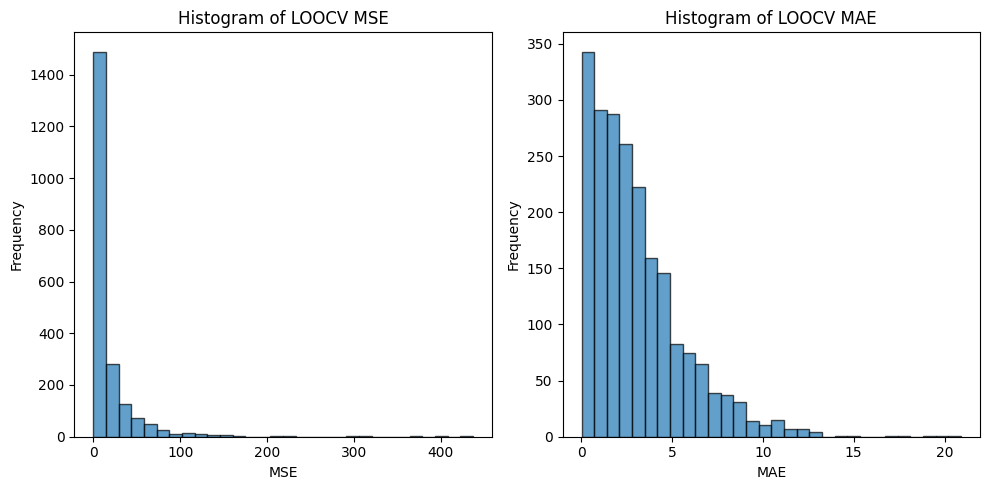

In [5]:
# Eliminar filas con valores faltantes en las variables seleccionadas o en la variable de respuesta
data_cleaned = data[['Life expectancy'] + variables_seleccionadas].dropna()

# Crear la matriz X y el vector y
X = data_cleaned[variables_seleccionadas].values
y = data_cleaned['Life expectancy'].values

# Configurar el modelo de regresión lineal
model = MiRegresionLineal()

# Inicializar listas para guardar los resultados
mse_scores_loocv = []
mae_scores_loocv = []

# Número de observaciones en el conjunto de datos
n = X.shape[0]

# Implementación de LOOCV
for i in range(n):
    X_test = X[i, :].reshape(1, -1)
    y_test = y[i]

    # Usar el resto de las observaciones como el conjunto de entrenamiento
    X_train = np.delete(X, i, axis=0)
    y_train = np.delete(y, i, axis=0)

    # Añadir columna de unos a X_train y X_test para el término independiente
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]

    # Ajustar el modelo
    model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular y almacenar las métricas
    mse_scores_loocv.append(mean_squared_error([y_test], y_pred))
    mae_scores_loocv.append(mean_absolute_error([y_test], y_pred))

# Graficar histogramas
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(mse_scores_loocv, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of LOOCV MSE')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(mae_scores_loocv, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of LOOCV MAE')
plt.xlabel('MAE')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Agrega al conjunto de datos columnas que representen los cuadrados de las variables predictoras (por ejemplo, X112, X132), así como los productos entre pares de variables (por ejemplo, X1xX2, X3xX4). Repita los pasos 1, 2 y 3 pero con este nuevo conjunto de datos.


In [ ]:
# Lista de variables seleccionadas con su correspondiente número de variable
variables_seleccionadas = [
    'Adult Mortality', 'infant deaths', 'Alcohol',
    'percentage expenditure', 'Measles', 'BMI',
    'under-five deaths', 'Total expenditure',
    'Diphtheria', 'HIV/AIDS', 'Population',
    'thinness  1-19 years', 'thinness 5-9 years',
    'Schooling'
]

# Crear un diccionario para almacenar las nuevas columnas
new_columns_dict = {}

# Crear columnas para los cuadrados de las variables seleccionadas
for var in variables_seleccionadas:
    new_columns_dict[f'{var}^2'] = data[var] ** 2

# Crear columnas para los productos entre pares de variables seleccionadas
for i in range(0, len(variables_seleccionadas), 2):
    var1 = variables_seleccionadas[i]
    var2 = variables_seleccionadas[i + 1]
    new_columns_dict[f'{var1}x{var2}'] = data[var1] * data[var2]

# Convertir el diccionario a DataFrame
new_columns = pd.DataFrame(new_columns_dict, index=data.index)

# Concatenar todas las nuevas columnas al DataFrame original de una vez
data_extended = pd.concat([data, new_columns], axis=1)

# Guardar el nuevo conjunto de datos en un archivo CSV
data_extended.to_csv('life_expectancy_data_extended.csv', index=False)


In [ ]:
# Cargar el archivo CSV
file_path = 'life_expectancy_data_extended.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas para inspeccionar las columnas
data.head(), data.columns


(       Country  Year      Status  Life expectancy  Adult Mortality  \
 0  Afghanistan  2015  Developing             65.0            263.0   
 1  Afghanistan  2014  Developing             59.9            271.0   
 2  Afghanistan  2013  Developing             59.9            268.0   
 3  Afghanistan  2012  Developing             59.5            272.0   
 4  Afghanistan  2011  Developing             59.2            275.0   
 
    infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
 0             62     0.01               71.279624         65.0     1154  ...   
 1             64     0.01               73.523582         62.0      492  ...   
 2             66     0.01               73.219243         64.0      430  ...   
 3             69     0.01               78.184215         67.0     2787  ...   
 4             71     0.01                7.097109         68.0     3013  ...   
 
    thinness  1-19 years^2  thinness 5-9 years^2  Schooling^2  \
 0                 

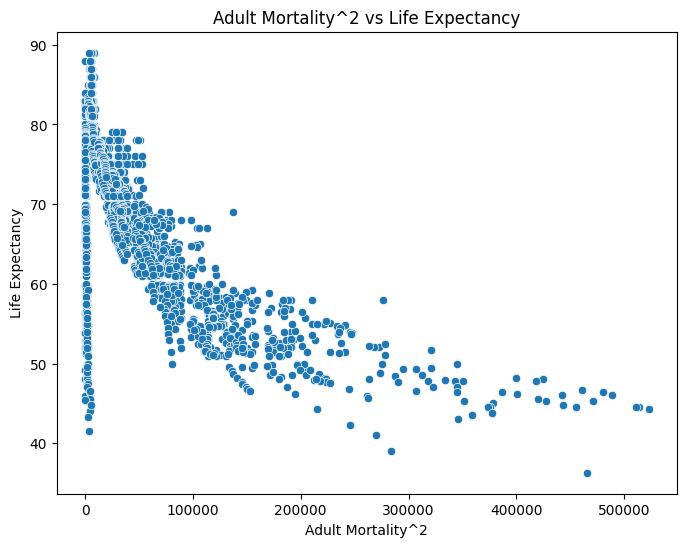

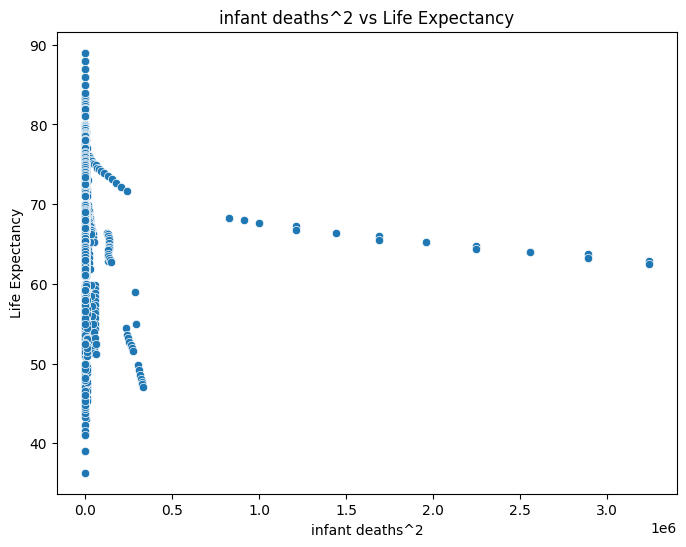

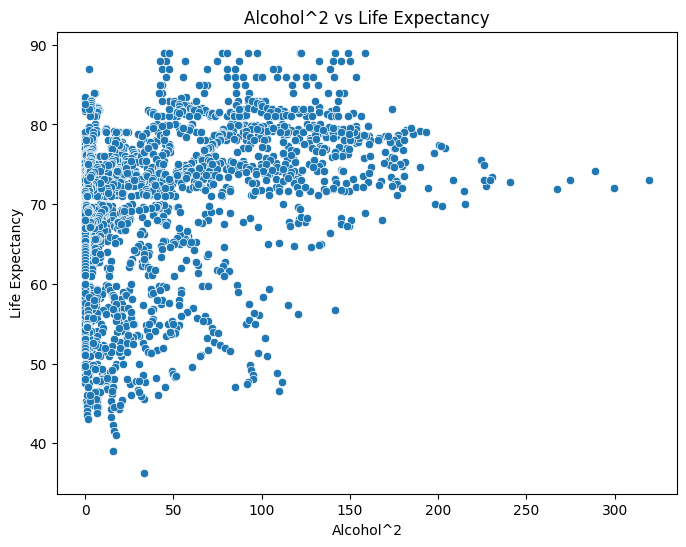

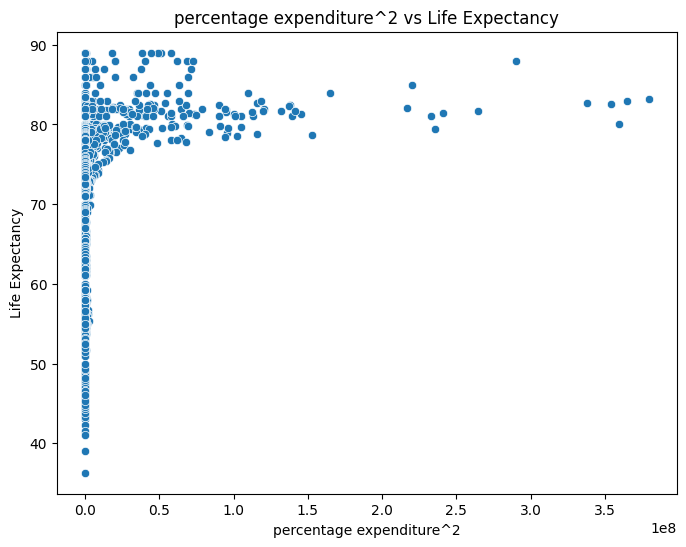

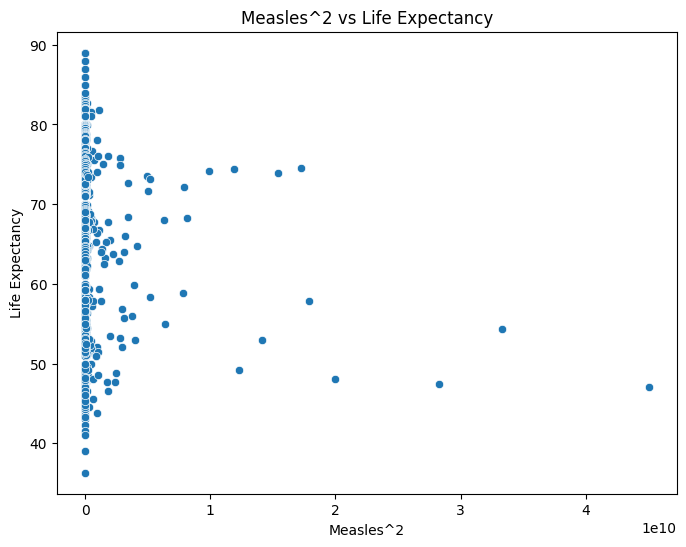

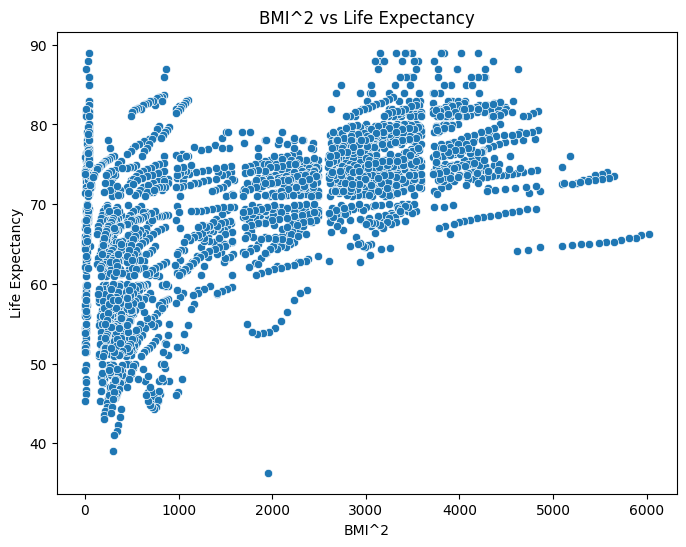

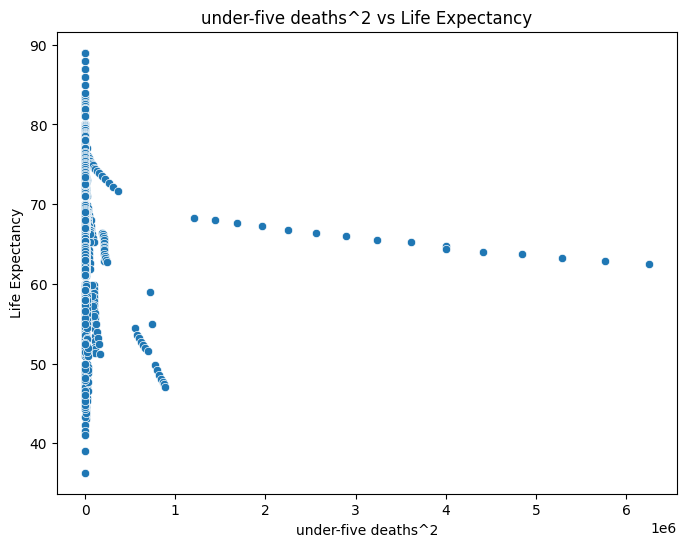

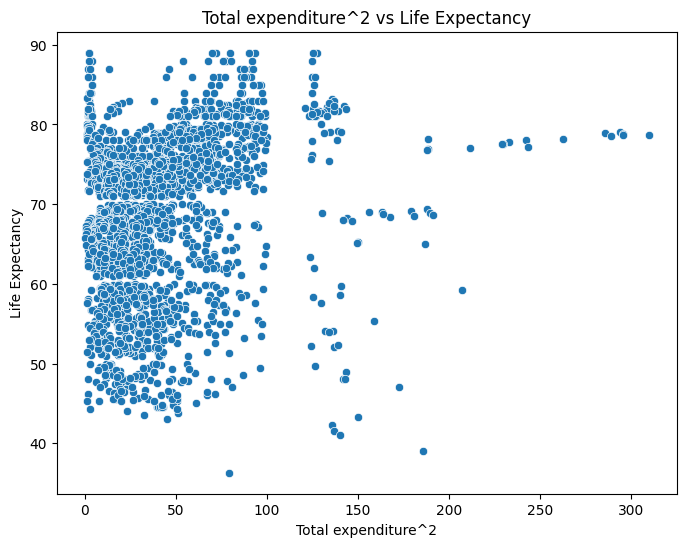

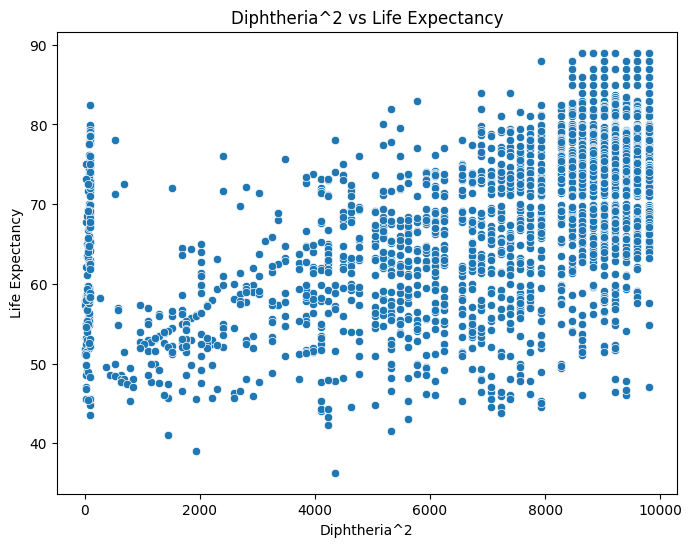

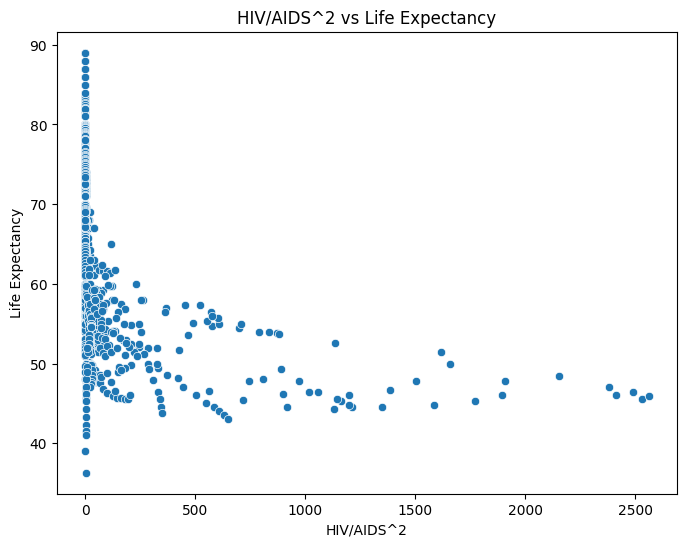

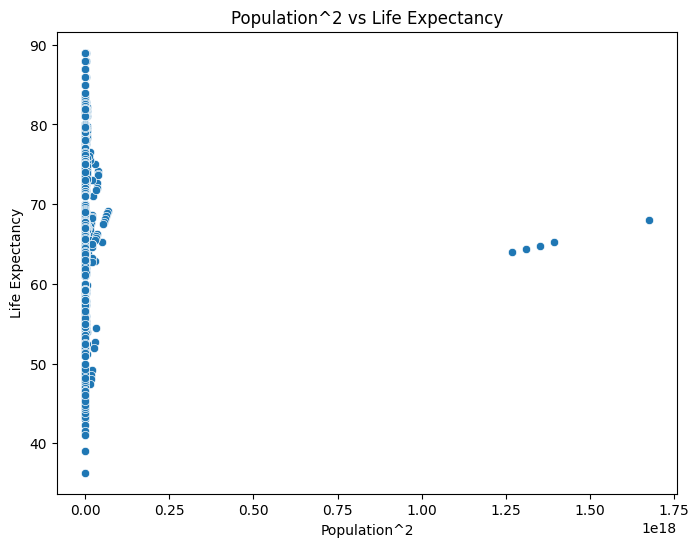

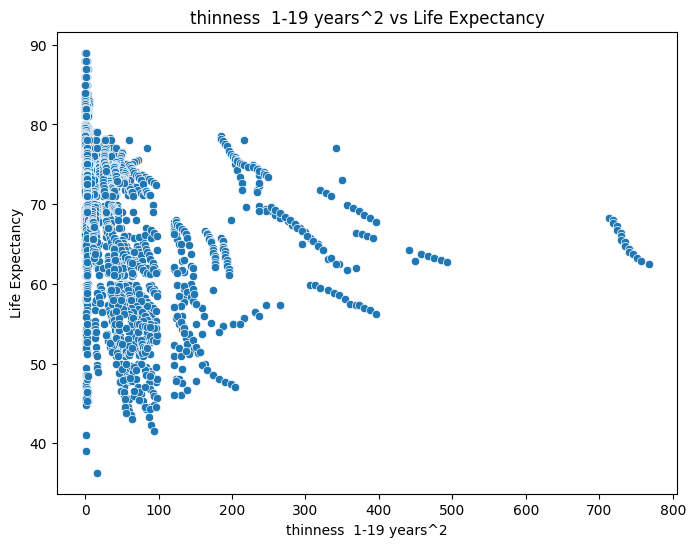

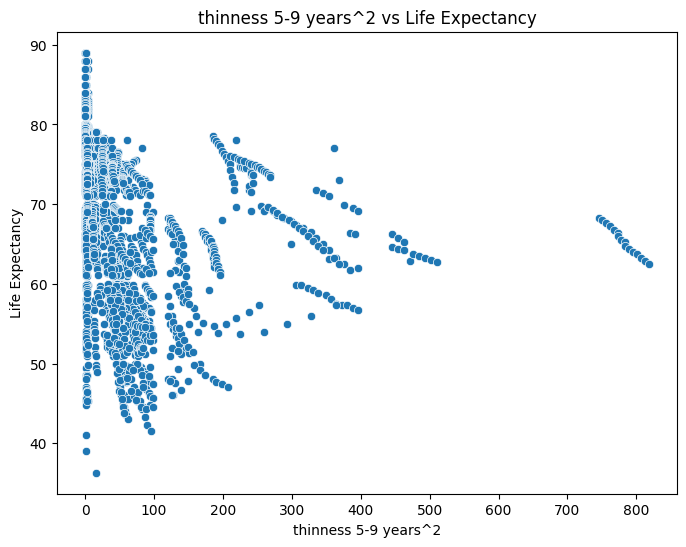

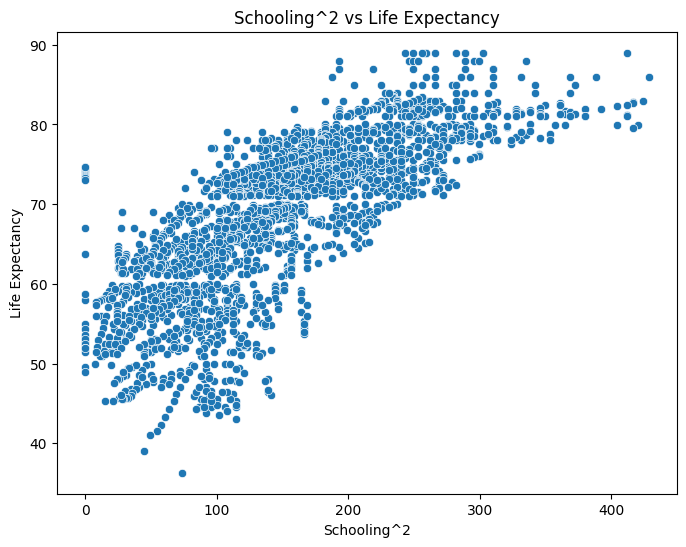

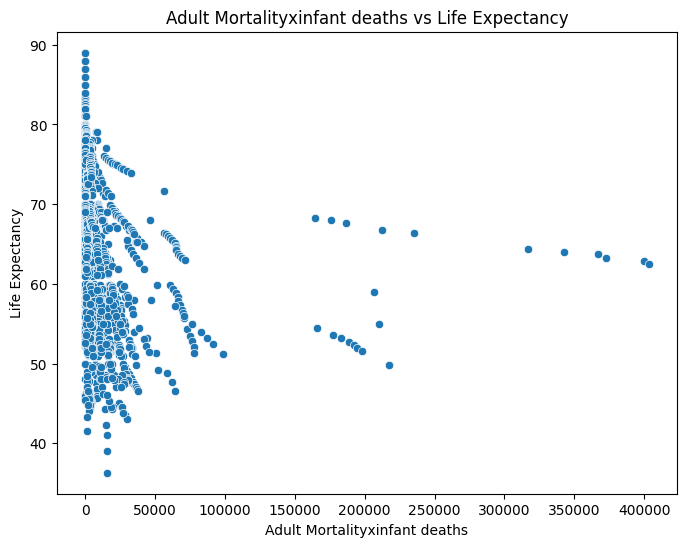

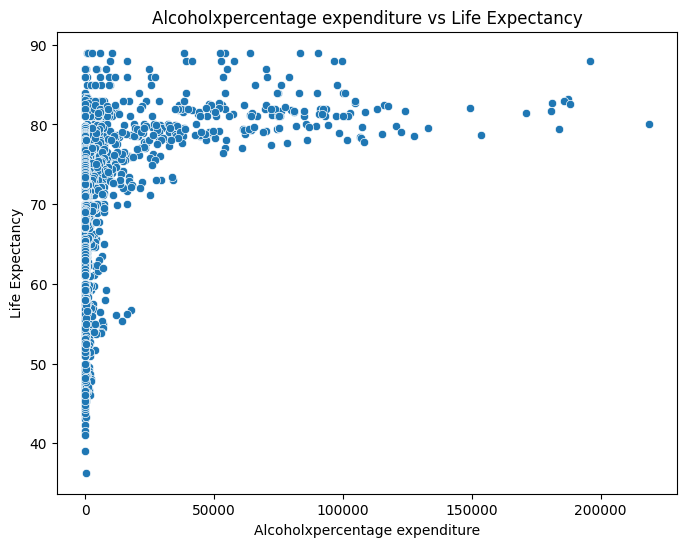

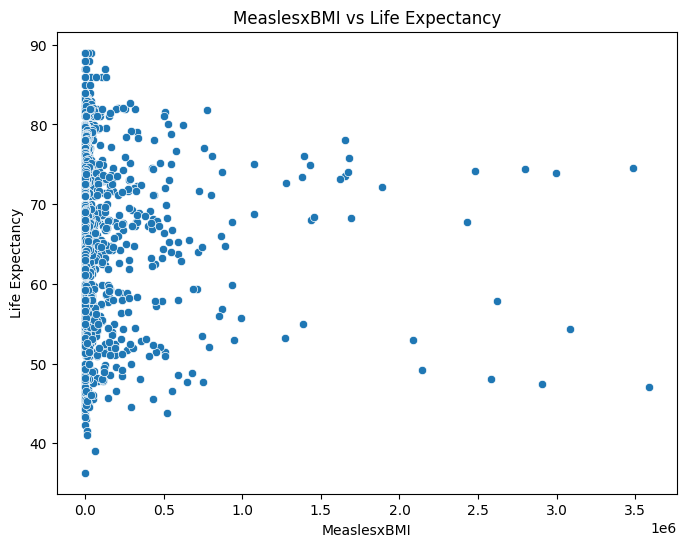

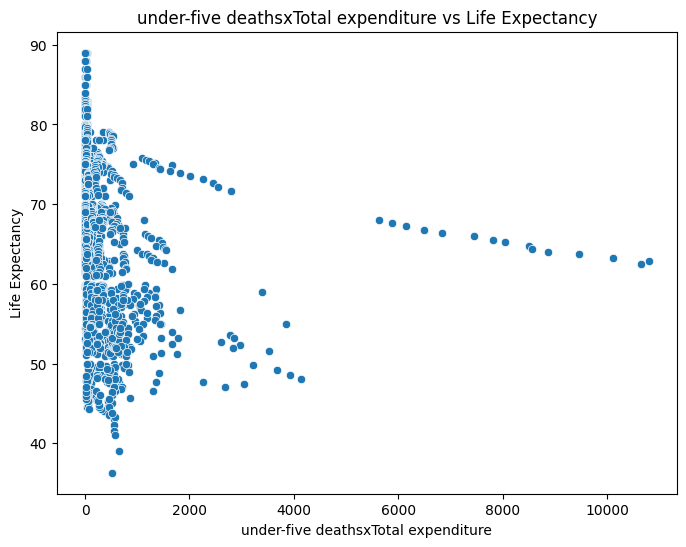

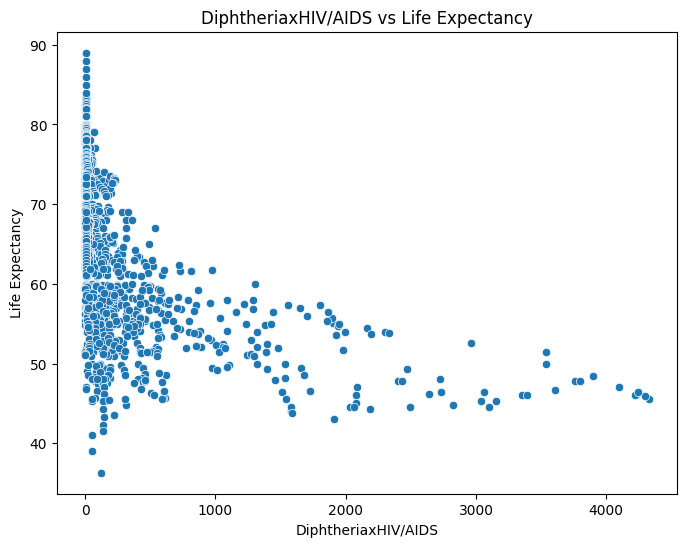

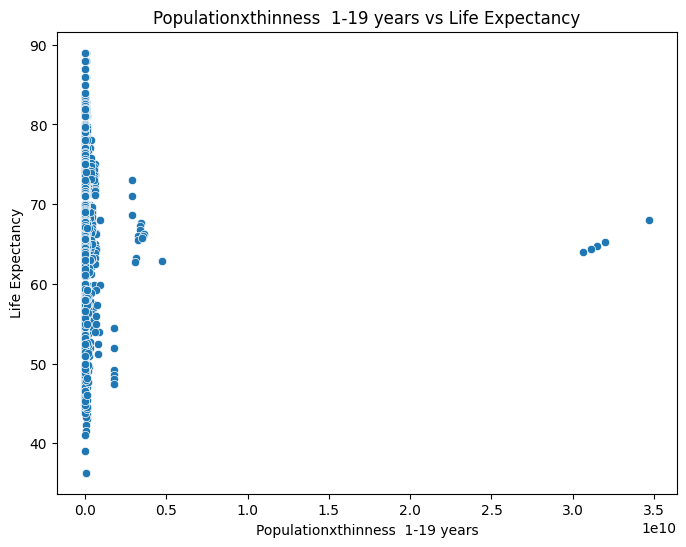

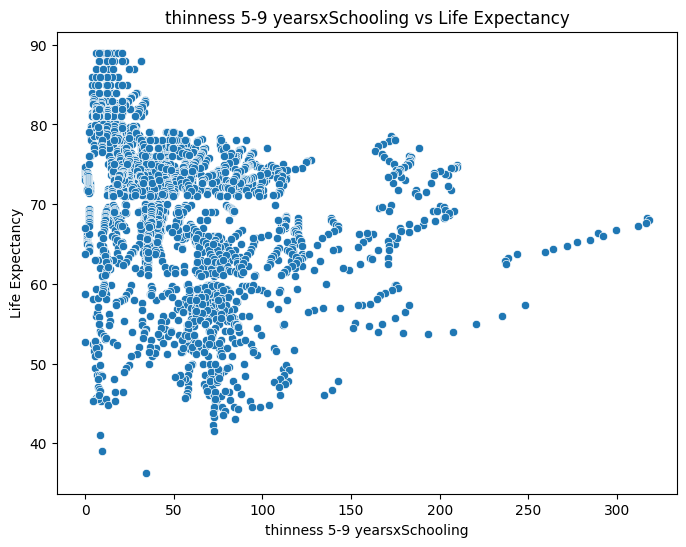

In [ ]:
variables_seleccionadas2 = [
        'Adult Mortality^2', 'infant deaths^2', 'Alcohol^2',
        'percentage expenditure^2', 'Measles^2', 'BMI^2', 'under-five deaths^2',
        'Total expenditure^2', 'Diphtheria^2', 'HIV/AIDS^2', 'Population^2',
        'thinness  1-19 years^2', 'thinness 5-9 years^2', 'Schooling^2',
        'Adult Mortalityxinfant deaths', 'Alcoholxpercentage expenditure',
        'MeaslesxBMI', 'under-five deathsxTotal expenditure',
        'DiphtheriaxHIV/AIDS', 'Populationxthinness  1-19 years',
        'thinness 5-9 yearsxSchooling'
]

# Crear gráficos de dispersión para cada variable predictora vs Life expectancy
for variable in variables_seleccionadas2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[variable], y=data['Life expectancy'])
    plt.title(f'{variable} vs Life Expectancy')
    plt.xlabel(variable)
    plt.ylabel('Life Expectancy')
    plt.show()

In [ ]:
# Eliminar filas con valores faltantes en las variables seleccionadas o en la variable de respuesta
data_cleaned = data[['Life expectancy'] + variables_seleccionadas2].dropna()

# Crear la matriz X (añadiendo una columna de unos para el término independiente)
X = data_cleaned[variables_seleccionadas2]
X = np.c_[np.ones(X.shape[0]), X]  # Añadir columna de unos

# Crear el vector y
y = data_cleaned['Life expectancy']

# Calcular los coeficientes usando la fórmula directa
# beta = (X^T * X)^-1 * X^T * y
beta = np.linalg.inv(X.T @ X) @ (X.T @ y)

# Mostrar los coeficientes
coeficientes = pd.Series(beta, index=['Intercept'] + variables_seleccionadas2)
print(coeficientes)

Intercept                              5.708470e+01
Adult Mortality^2                     -3.787107e-05
infant deaths^2                        2.706418e-05
Alcohol^2                             -1.688529e-02
percentage expenditure^2              -1.611937e-08
Measles^2                             -2.169119e-10
BMI^2                                  6.983544e-04
under-five deaths^2                   -1.141136e-05
Total expenditure^2                    1.969356e-04
Diphtheria^2                           6.504108e-04
HIV/AIDS^2                             7.276697e-03
Population^2                          -2.075624e-17
thinness  1-19 years^2                -2.389445e-03
thinness 5-9 years^2                   1.108400e-02
Schooling^2                            5.975174e-02
Adult Mortalityxinfant deaths          2.210013e-05
Alcoholxpercentage expenditure         4.977064e-05
MeaslesxBMI                            2.420181e-06
under-five deathsxTotal expenditure   -2.926375e-03
DiphtheriaxH

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Eliminar filas con valores faltantes en las variables seleccionadas o en la variable de respuesta
data_cleaned = data[['Life expectancy'] + variables_seleccionadas2].dropna()

# Crear la matriz X y el vector y
X = data_cleaned[variables_seleccionadas2]
y = data_cleaned['Life expectancy']

# Definir el modelo de regresión lineal
model = MiRegresionLineal()

# Definir la validación cruzada de k-pliegues (k=5)
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=1)

# Listas para almacenar los resultados de cada pliegue
mse_cv = []
mae_cv = []
r2_cv = []

# Bucle de validación cruzada
for train_index, test_index in kf.split(X):

    # Separar los datos de entrenamiento y prueba
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Ajustar el modelo con los datos de entrenamiento
    model.fit(X_train, y_train)

    # Predecir con los datos de prueba
    y_pred = model.predict(X_test)

    # Calcular MSE, MAE y R²
    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)

    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)

    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)

# Mostrar los resultados promedios
print(f"R² promedio: {np.mean(r2_cv):.4f}")
print(f"MSE promedio: {np.mean(mse_cv):.4f}")
print(f"MAE promedio: {np.mean(mae_cv):.4f}")


R² promedio: 0.8296
MSE promedio: 16.5723
MAE promedio: 3.0958


Implementa regresión Ridge con descenso de gradiente, y genera el gráfico de Ridge para el conjunto de datos original (sin las variables elevadas al cuadrado).


Coeficientes para algunos valores de lambda:
[[-2.22897504  0.41479831 -0.3320112   0.89561002 -0.23233352  1.02946899
  -0.40895993 -0.02429061  1.10156465 -2.82330746  0.09103993 -0.26438861
   0.00491111  4.54155586]
 [-2.22897504  0.4147983  -0.33201119  0.89561002 -0.23233352  1.02946899
  -0.40895993 -0.02429061  1.10156465 -2.82330746  0.09103993 -0.26438861
   0.00491111  4.54155585]
 [-2.22897504  0.4147983  -0.33201119  0.89561002 -0.23233352  1.02946899
  -0.40895992 -0.02429061  1.10156466 -2.82330745  0.09103993 -0.26438861
   0.00491111  4.54155583]
 [-2.22897504  0.4147983  -0.33201118  0.89561002 -0.23233352  1.02946899
  -0.40895992 -0.02429061  1.10156466 -2.82330745  0.09103993 -0.26438861
   0.0049111   4.54155582]
 [-2.22897504  0.41479829 -0.33201117  0.89561002 -0.23233352  1.029469
  -0.40895992 -0.02429061  1.10156466 -2.82330744  0.09103993 -0.26438861
   0.0049111   4.5415558 ]]


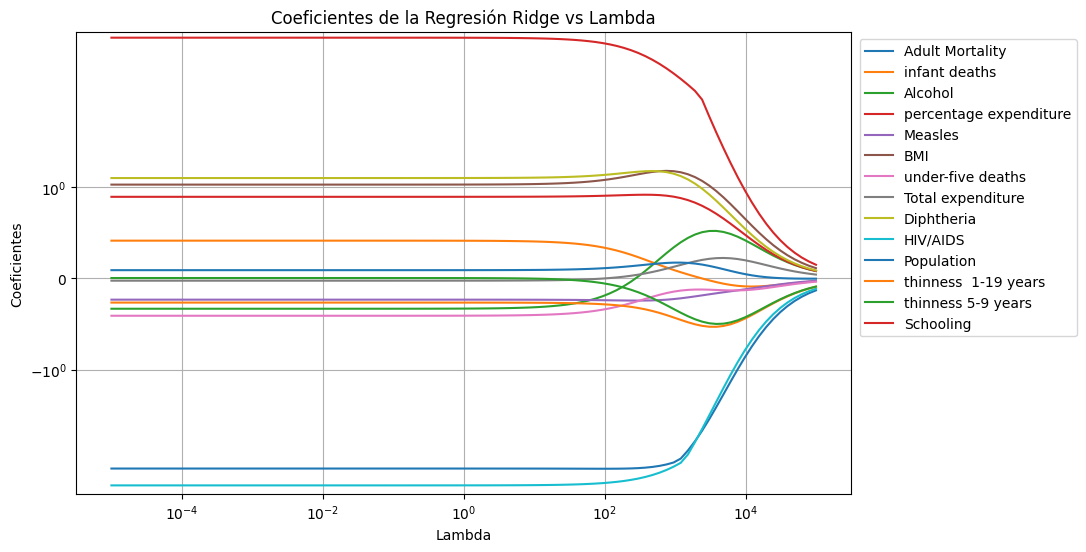


Variables más relevantes para el modelo Ridge con lambda = 1.1233240329780265 :
Schooling: 4.5372 (RELEVANTE)
HIV/AIDS: -2.8222 (RELEVANTE)
Adult Mortality: -2.2291 (RELEVANTE)
Diphtheria: 1.1020 (RELEVANTE)
BMI: 1.0302 (RELEVANTE)
percentage expenditure: 0.8958 
infant deaths: 0.4138 
under-five deaths: -0.4080 
Alcohol: -0.3302 
thinness  1-19 years: -0.2646 
Measles: -0.2324 
Population: 0.0913 
Total expenditure: -0.0240 
thinness 5-9 years: 0.0042 


In [30]:
data_cleaned = data[['Life expectancy'] + variables_seleccionadas].dropna()

X = data_cleaned[variables_seleccionadas].values
y = data_cleaned['Life expectancy'].values

# Estandarizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Agregar columna de unos para el término independiente
X = np.c_[np.ones(X.shape[0]), X]

# Parámetros iniciales
alpha = 0.01  # Tasa de aprendizaje
lambdas = np.logspace(-5, 5, 100)  # Lista de valores de lambda
iterations = 1000  # Número de iteraciones
n_samples, n_features = X.shape

# Inicializar los coeficientes
coeficientes_ridge = []

# Implementar Ridge con descenso de gradiente
for l in lambdas:
    beta = np.zeros(n_features)
    for _ in range(iterations):
        gradient = (X.T @ (X @ beta - y) + l * beta) / n_samples
        beta -= alpha * gradient
    coeficientes_ridge.append(beta[1:])

# Convertir la lista a un array numpy
coeficientes_ridge = np.array(coeficientes_ridge)

# Verificar algunos coeficientes
print("Coeficientes para algunos valores de lambda:")
print(coeficientes_ridge[:5])  # Imprime los primeros 5 sets de coeficientes

# Generar el gráfico de Ridge con ajustes
plt.figure(figsize=(10, 6))
for i in range(coeficientes_ridge.shape[1]):
    plt.plot(lambdas, coeficientes_ridge[:, i], label=variables_seleccionadas[i])
plt.xscale('log')
plt.yscale('symlog')  # Usar una escala simétrica logarítmica para ver mejor los valores pequeños
plt.xlabel('Lambda')
plt.ylabel('Coeficientes')
plt.title('Coeficientes de la Regresión Ridge vs Lambda')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

# Identificar las variables más relevantes para un valor específico de lambda
# (por ejemplo, usando la lambda en el medio de la escala)
indice_lambda_medio = len(lambdas) // 2
coeficientes_finales = coeficientes_ridge[indice_lambda_medio]

# Ordenar las variables por la magnitud de sus coeficientes
variables_relevantes = sorted(zip(variables_seleccionadas, coeficientes_finales), key=lambda x: abs(x[1]), reverse=True)

print("\nVariables más relevantes para el modelo Ridge con lambda =", lambdas[indice_lambda_medio], ":")
for variable, coef in variables_relevantes:
    relevancia = "(RELEVANTE)" if abs(coef) > 1 else ""
    print(f"{variable}: {coef:.4f} {relevancia}")



Utiliza una librería para generar el gráfico de Lasso para el conjunto de datos original (sin las variables elevadas al cuadrado). ¿Qué variables son más relevantes para el modelo?


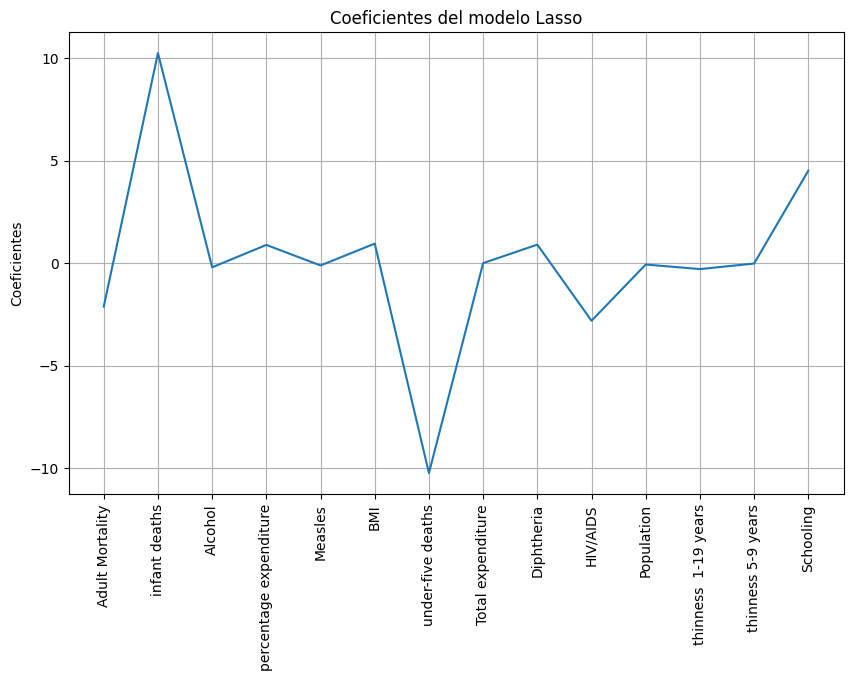

Coeficientes del modelo Lasso:
Adult Mortality: -2.1204 (RELEVANTE)
infant deaths: 10.2477 (RELEVANTE)
Alcohol: -0.2045 (RELEVANTE)
percentage expenditure: 0.8888 (RELEVANTE)
Measles: -0.1128 (RELEVANTE)
BMI: 0.9514 (RELEVANTE)
under-five deaths: -10.2373 (RELEVANTE)
Total expenditure: 0.0000
Diphtheria: 0.9028 (RELEVANTE)
HIV/AIDS: -2.8104 (RELEVANTE)
Population: -0.0680
thinness  1-19 years: -0.2902 (RELEVANTE)
thinness 5-9 years: -0.0200
Schooling: 4.5096 (RELEVANTE)


In [32]:
from sklearn.linear_model import LassoCV

# Eliminar filas con valores faltantes en las variables seleccionadas o en la variable de respuesta
data_cleaned = data[['Life expectancy'] + variables_seleccionadas].dropna()

X = data_cleaned[variables_seleccionadas].values
y = data_cleaned['Life expectancy'].values

# Estandarizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Ajustar el modelo Lasso con validación cruzada para encontrar el mejor valor de alpha
model_lasso = LassoCV(cv=5, fit_intercept=True, max_iter=5000).fit(X, y)

# Obtener los coeficientes del modelo
coeficientes_lasso = model_lasso.coef_

# Graficar los coeficientes
plt.figure(figsize=(10, 6))
plt.plot(range(len(variables_seleccionadas)), coeficientes_lasso)
plt.xticks(range(len(variables_seleccionadas)), variables_seleccionadas, rotation=90)
plt.ylabel('Coeficientes')
plt.title('Coeficientes del modelo Lasso')
plt.grid(True)
plt.show()

# Imprimir los coeficientes y destacar los más relevantes
print("Coeficientes del modelo Lasso:")
for i, coef in enumerate(coeficientes_lasso):
    if abs(coef) > 0.1:  # Ajusta este umbral según tus necesidades
        print(f"{variables_seleccionadas[i]}: {coef:.4f} (RELEVANTE)")
    else:
        print(f"{variables_seleccionadas[i]}: {coef:.4f}")

**¿Consideras que el modelo de regresión lineal es efectivo para modelar los datos del problema? ¿Por qué?**

Considero que el modelo de regresion lineal si es efectivo para la resolución de este problema ya que el valor promedio de R2 es considerablemente alto con el 0.83.


**¿Observas una variabilidad importante en los valores de R2, MSE y MAE cuando aplicas validación cruzada? Detalla tu respuesta.**

Utilizando Monte Carlo con 1000 iteraciones no se muestra una gran variabilidad, pero al usar LOOCV si varia mas el MSE y MAE.

**¿Qué modelo es mejor para los datos del problema, el lineal o el cuadrático? ¿Por qué?**

El modelo cuadrático muestra un r2 ligeramente menor al modelo lineal y un aumento en el MSE y MAE. Considero que el **modelo lineal** es mejor ya que mantiene un equilibrio entre entre simplicidad y precisión.

**¿Qué variables son más relevantes para el modelo según Ridge y Lasso?**

Para Lasso son importantes las que su coeficiente > 0.1, las cuales son
Adult Mortality,
infant deaths,
Alcohol,
percentage expenditure,
Measles,
BMI,
under-five deaths,
Diphtheria,
HIV/AIDS,
thinness 1-19 years y
Schooling.

en Rigde las variables que se mantienen con coeficientes mas altos son Schooling, HIV/AIDS, Adult Mortality, Diphtheria y BMI.

**¿Encuentras alguna relación interesante entre la variable de respuesta y los predictores?**

Adult Mortality, HIV/AIDS y Alcohol tienen coeficientes negativos en la prediccion de la esperanza de vida como era de esperarse y Schooling tiene coeficiente positivo.

# Ejercicio 2


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer,r2_score



In [34]:
df = pd.read_csv('parkinsons_updrs.data', delimiter=',')

# Guarda el DataFrame como un archivo .csv
df.to_csv('parkinsons_updrs.csv', index=False)  # Cambia 'tu_archivo.csv' por la ruta de destino

data = pd.read_csv('parkinsons_updrs.csv')

print(data.head())


   subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
0         1   72    0     5.6431       28.199       34.398    0.00662   
1         1   72    0    12.6660       28.447       34.894    0.00300   
2         1   72    0    19.6810       28.695       35.389    0.00481   
3         1   72    0    25.6470       28.905       35.810    0.00528   
4         1   72    0    33.6420       29.187       36.375    0.00335   

   Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
0     0.000034     0.00401      0.00317  ...        0.230       0.01438   
1     0.000017     0.00132      0.00150  ...        0.179       0.00994   
2     0.000025     0.00205      0.00208  ...        0.181       0.00734   
3     0.000027     0.00191      0.00264  ...        0.327       0.01106   
4     0.000020     0.00093      0.00130  ...        0.176       0.00679   

   Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
0       0.01309        0.01662      

In [35]:
variables_seleccionadas = [
    'age',
    'test_time',
    'Jitter(Abs)',
    'Jitter:RAP',
    'Jitter:PPQ5',
    'Jitter:DDP',
    'Shimmer(dB)',
    'Shimmer:APQ3',
    'Shimmer:APQ5',
    'Shimmer:APQ11',
    'NHR',
    'HNR',
    'RPDE',
    'DFA',
    'sex'
]

X = df[variables_seleccionadas]
y = df['motor_UPDRS']

Evalúa con validación cruzada un modelo
de regresión lineal para las variables asignadas según tu matrícula utilizando alguna librería o framework.


In [ ]:

# Definir el modelo de regresión lineal
model = MiRegresionLineal()

# Definir la validación cruzada de k-pliegues (k=5)
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# Calcular R², MSE y MAE con validación cruzada
r2_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
mse_scores = cross_val_score(model, X, y, cv=kfold, scoring=make_scorer(mean_squared_error))
mae_scores = cross_val_score(model, X, y, cv=kfold, scoring=make_scorer(mean_absolute_error))

# Mostrar los resultados
print(f"R²: {np.mean(r2_scores):.4f}")
print(f"MSE: {np.mean(mse_scores):.4f}")
print(f"MAE: {np.mean(mae_scores):.4f}")


R²: 0.1396
MSE: 56.8187
MAE: 6.3675


Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.

In [ ]:
def find_optimal_k(X, y, max_k):
    best_k = 0
    best_rmse = float('inf')
    best_features = []

    for k in range(1, max_k + 1):
        selector = SelectKBest(f_regression, k=k)
        X_new = selector.fit_transform(X, y)

        model = MiRegresionLineal()
        cv = KFold(n_splits=10, shuffle=True, random_state=1)
        scores = cross_val_score(model, X_new, y, scoring='neg_mean_squared_error', cv=cv)
        rmse_scores = np.sqrt(-scores)

        mean_rmse = rmse_scores.mean()
        if mean_rmse < best_rmse:
            best_rmse = mean_rmse
            best_k = k
            best_features = selector.get_support(indices=True)

    return best_k, best_rmse, best_features

max_k = len(variables_seleccionadas)
best_k, best_rmse, best_features = find_optimal_k(X, y, max_k)

print(f"Best number of features: {best_k}")
print(f"Best RMSE: {best_rmse}")
print("Selected features:", [variables_seleccionadas[i] for i in best_features])


Best number of features: 15
Best RMSE: 7.53826632396059
Selected features: ['age', 'test_time', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'NHR', 'HNR', 'RPDE', 'DFA', 'sex']


Repite el paso anterior pero con
selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.


In [ ]:
# Modelo de regresión lineal
model = MiRegresionLineal()

# Configura la validación cruzada
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# Realiza la selección secuencial de características
sfs = SequentialFeatureSelector(model, n_features_to_select="auto", direction='forward', cv=cv, scoring='neg_mean_squared_error')

# Ajusta el selector a los datos
sfs.fit(X, y)

# Obtener las características seleccionadas
selected_features = sfs.get_support(indices=True)

print(f"Number of selected features: {len(selected_features)}")
print("Selected features:", [variables_seleccionadas[i] for i in selected_features])

# Evaluar el modelo con las características seleccionadas
X_selected = X.iloc[:, selected_features]
scores = cross_val_score(model, X_selected, y, cv=cv, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print(f"Mean RMSE: {rmse_scores.mean()}")
print(f"Standard deviation of RMSE: {rmse_scores.std()}")

Number of selected features: 7
Selected features: ['age', 'test_time', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'HNR', 'DFA']
Mean RMSE: 7.56583814068158
Standard deviation of RMSE: 0.17544618090577485


Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo. Reporta los predictores óptimos encontrados por el método.


In [ ]:

# Modelo de regresión lineal
model = MiRegresionLineal()

# Configura la validación cruzada
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# Realiza RFE para encontrar el número óptimo de características
best_score = float('inf')
best_n_features = 0
best_features = []

for n_features in range(1, len(variables_seleccionadas) + 1):
    rfe = RFE(model, n_features_to_select=n_features)
    rfe.fit(X, y)

    # Evaluar el rendimiento con validación cruzada
    X_rfe = rfe.transform(X)
    scores = cross_val_score(model, X_rfe, y, cv=cv, scoring='neg_mean_squared_error')
    mean_score = np.mean(np.sqrt(-scores))

    # Guardar el mejor número de características
    if mean_score < best_score:
        best_score = mean_score
        best_n_features = n_features
        best_features = rfe.support_

# Imprimir los resultados
print(f"Optimal number of features: {best_n_features}")
print(f"Mean RMSE with optimal features: {best_score}")
print("Selected features:", [variables_seleccionadas[i] for i in range(len(variables_seleccionadas)) if best_features[i]])


Optimal number of features: 15
Mean RMSE with optimal features: 7.538266323982898
Selected features: ['age', 'test_time', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'NHR', 'HNR', 'RPDE', 'DFA', 'sex']


Repita los pasos anteriores, pero utilizando un modelo de regresión no lineal como K-vecinos más cercanos.


In [ ]:
# Modelo KNN
knn = KNeighborsRegressor(n_neighbors=5)

# Configura la validación cruzada
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# Realiza la selección secuencial de características
sfs = SequentialFeatureSelector(knn, n_features_to_select="auto", direction='forward', cv=cv, scoring='neg_mean_squared_error')

# Ajusta el selector a los datos
sfs.fit(X, y)

# Obtener las características seleccionadas
selected_features = sfs.get_support(indices=True)

print(f"Number of selected features: {len(selected_features)}")
print("Selected features:", [variables_seleccionadas[i] for i in selected_features])

# Evaluar el modelo con las características seleccionadas
X_selected = X.iloc[:, selected_features]

# Calcular RMSE
mse_scores = cross_val_score(knn, X_selected, y, cv=cv, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)

# Calcular R²
r2_scores = cross_val_score(knn, X_selected, y, cv=cv, scoring='r2')

print(f"Mean RMSE: {rmse_scores.mean():.4f}")
print(f"Standard deviation of RMSE: {rmse_scores.std():.4f}")
print(f"Mean R²: {r2_scores.mean():.4f}")
print(f"Standard deviation of R²: {r2_scores.std():.4f}")


Number of selected features: 7
Selected features: ['age', 'test_time', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Shimmer:APQ3', 'DFA']
Mean RMSE: 1.8109
Standard deviation of RMSE: 0.2107
Mean R²: 0.9494
Standard deviation of R²: 0.0122


SelectKBest

In [ ]:
# Configura la validación cruzada
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# Encuentra el número óptimo de características
best_k = 0
best_rmse = float('inf')
best_r2 = -float('inf')
best_features_rmse = []
best_features_r2 = []

for k in range(1, len(variables_seleccionadas) + 1):
    selector = SelectKBest(f_regression, k=k)
    X_new = selector.fit_transform(X, y)

    knn = KNeighborsRegressor(n_neighbors=5)

    # Evaluar el modelo para RMSE
    mse_scores = cross_val_score(knn, X_new, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-mse_scores)
    mean_rmse = rmse_scores.mean()

    # Evaluar el modelo para R²
    r2_scores = cross_val_score(knn, X_new, y, cv=cv, scoring='r2')
    mean_r2 = r2_scores.mean()

    # Seleccionar el mejor número de características basado en RMSE
    if mean_rmse < best_rmse:
        best_rmse = mean_rmse
        best_k = k
        best_features_rmse = selector.get_support(indices=True)

    # Seleccionar el mejor número de características basado en R²
    if mean_r2 > best_r2:
        best_r2 = mean_r2
        best_features_r2 = selector.get_support(indices=True)

print(f"Best number of features based on RMSE: {best_k}")
print(f"Mean RMSE: {best_rmse:.4f}")
print("Selected features for RMSE:", [variables_seleccionadas[i] for i in best_features_rmse])
print(f"Mean R²: {best_r2:.4f}")


Best number of features based on RMSE: 6
Mean RMSE: 4.0603
Selected features for RMSE: ['age', 'Shimmer(dB)', 'Shimmer:APQ11', 'HNR', 'RPDE', 'DFA']
Mean R²: 0.7492


SequentialFeatureSelector

In [ ]:
# Modelo KNN
knn = KNeighborsRegressor(n_neighbors=5)

# Configura la validación cruzada
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# Realiza la selección secuencial de características
sfs = SequentialFeatureSelector(knn, n_features_to_select="auto", direction='forward', cv=cv, scoring='neg_mean_squared_error')

# Ajusta el selector a los datos
sfs.fit(X, y)

# Obtener las características seleccionadas
selected_features = sfs.get_support(indices=True)

print(f"Number of selected features: {len(selected_features)}")
print("Selected features:", [variables_seleccionadas[i] for i in selected_features])

# Evaluar el modelo con las características seleccionadas
X_selected = X.iloc[:, selected_features]

# Calcular RMSE
mse_scores = cross_val_score(knn, X_selected, y, cv=cv, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)

# Calcular R²
r2_scores = cross_val_score(knn, X_selected, y, cv=cv, scoring='r2')

print(f"Mean RMSE: {rmse_scores.mean():.4f}")
print(f"Standard deviation of RMSE: {rmse_scores.std():.4f}")
print(f"Mean R²: {r2_scores.mean():.4f}")
print(f"Standard deviation of R²: {r2_scores.std():.4f}")


Number of selected features: 7
Selected features: ['age', 'test_time', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Shimmer:APQ3', 'DFA']
Mean RMSE: 1.8109
Standard deviation of RMSE: 0.2107
Mean R²: 0.9494
Standard deviation of R²: 0.0122


Busca al menos otros 4 modelos de regresión no lineal, y lleva a cabo los pasos del 1 al 5.




In [ ]:
# Configurar validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Definir los modelos no lineales
models = {
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=1),
    "SVR": SVR(kernel='rbf'),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=1),
    "MLPRegressor": MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=1)
}

# Método Filter con SelectKBest
for model_name, model in models.items():
    best_k = 0
    best_rmse_score = float('inf')
    best_r2_score = -float('inf')
    best_features = []

    for k in range(1, len(variables_seleccionadas) + 1):
        selector = SelectKBest(f_regression, k=k)
        X_new = selector.fit_transform(X, y)

        # Evaluar el modelo para RMSE
        mse_scores = cross_val_score(model, X_new, y, cv=cv, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-mse_scores)
        mean_rmse = rmse_scores.mean()

        # Evaluar el modelo para R²
        r2_scores = cross_val_score(model, X_new, y, cv=cv, scoring='r2')
        mean_r2 = r2_scores.mean()

        # Seleccionar el mejor número de características basado en RMSE
        if mean_rmse < best_rmse_score:
            best_rmse_score = mean_rmse
            best_k = k
            best_features = selector.get_support(indices=True)

        # Seleccionar el mejor número de características basado en R²
        if mean_r2 > best_r2_score:
            best_r2_score = mean_r2
            best_k_r2 = k
            best_features_r2 = selector.get_support(indices=True)

    print(f"Model: {model_name}")
    print(f"Best number of features (Filter) based on RMSE: {best_k}")
    print(f"Mean RMSE (Filter): {best_rmse_score:.4f}")
    print(f"Best number of features (Filter) based on R²: {best_k_r2}")
    print(f"Mean R² (Filter): {best_r2_score:.4f}")
    print("Selected features (Filter) based on RMSE:", [variables_seleccionadas[i] for i in best_features])
    print("Selected features (Filter) based on R²:", [variables_seleccionadas[i] for i in best_features_r2])
    print("-" * 50)

# Método Wrapper con SequentialFeatureSelector
for model_name, model in models.items():
    sfs = SequentialFeatureSelector(model, n_features_to_select="auto", direction='forward', cv=cv, scoring='neg_mean_squared_error')

    sfs.fit(X, y)

    selected_features = sfs.get_support(indices=True)
    X_selected = X.iloc[:, selected_features]

    # Calcular RMSE
    mse_scores = cross_val_score(model, X_selected, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-mse_scores)

    # Calcular R²
    r2_scores = cross_val_score(model, X_selected, y, cv=cv, scoring='r2')

    print(f"Model: {model_name}")
    print(f"Number of selected features (Wrapper): {len(selected_features)}")
    print("Selected features (Wrapper):", [variables_seleccionadas[i] for i in selected_features])
    print(f"Mean RMSE (Wrapper): {rmse_scores.mean():.4f}")
    print(f"Standard deviation of RMSE (Wrapper): {rmse_scores.std():.4f}")
    print(f"Mean R² (Wrapper): {r2_scores.mean():.4f}")
    print(f"Standard deviation of R² (Wrapper): {r2_scores.std():.4f}")
    print("-" * 50)

Model: RandomForestRegressor
Best number of features (Filter) based on RMSE: 15
Mean RMSE (Filter): 1.2907
Best number of features (Filter) based on R²: 15
Mean R² (Filter): 0.9746
Selected features (Filter) based on RMSE: ['age', 'test_time', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'NHR', 'HNR', 'RPDE', 'DFA', 'sex']
Selected features (Filter) based on R²: ['age', 'test_time', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'NHR', 'HNR', 'RPDE', 'DFA', 'sex']
--------------------------------------------------
Model: SVR
Best number of features (Filter) based on RMSE: 1
Mean RMSE (Filter): 7.3942
Best number of features (Filter) based on R²: 1
Mean R² (Filter): 0.1713
Selected features (Filter) based on RMSE: ['age']
Selected features (Filter) based on R²: ['age']
--------------------------------------------------
Model: DecisionTre

**Consideras que el modelo de regresión lineal es adecuado para los datos. ¿Por qué?**

Para este problema considero que el modelo de regresion no lineal parece mas adecuado ya que el modelo lineal da valores de R2, MSE y MAE bajos y con una desviación considerable en las predicciones.

**¿Qué método de selección de características consideras que funciona bien con los datos? ¿Por qué?**

El metodo Wrapper combinado con el modelo de regresión no lineal como K-vecinos más cercanos, ya que permitio seleccionar un subconjunto de 7 caracteristicas con un R2 de 0.9494 y un RMSE bajo de 1.8109.

**Del proceso de selección de características, ¿puedes identificar algunas que sean sobresalientes? ¿Qué información relevantes observas de dichas características?**

Age, DFA y HNR, aparecen constantemente en la mayoria de metodos

**¿Los modelos de regresión no lineal funcionaron mejor que el lineal? ¿Por qué?**

En este problema los modelos no lineales funcionan mejor que los lineales. La relación entre las características y la severidad de la enfermedad de Parkinson es más compleja y no puede ser capturada de buena manera por un modelo lineal simple.

**¿Se puede concluir algo interesante sobre los resultados de modelar estos datos con regresión? Argumenta tu respuesta.**

Los modelos no lineales como K-vecinos más cercanos y RandomForestRegressor capturan de mejor manera estas relaciones complejas y muestran predicciones mas precisas que las lineales, tambien identifica las variables mas relevantes para mejorar el rendimiento.